Cell 0: Install and Import Packages

In [1]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install matplotlib



Cell 1: Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# 🔥 Use just the filename now — file is local to the notebook folder
df = pd.read_csv("job_descriptions.csv")

# Show sample
df.head()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


Cell 2: Load Job Discriptions

In [4]:
# Job Descriptions

job_descriptions = [
    "We are seeking a Machine Learning Engineer with experience in TensorFlow, Kubernetes, and AWS deployment.",
    "Hiring: Backend Developer skilled in Django, REST APIs, PostgreSQL, and Docker.",
    "Looking for an AI Prompt Engineer to optimize GPT-4 based systems and manage AI training datasets.",
    "Cybersecurity Analyst needed to oversee threat monitoring and implement Zero Trust architectures.",
    "Hiring a Cloud Solutions Architect familiar with Azure, Google Cloud, and cloud-native app deployment."
]

df_jobs = pd.DataFrame(job_descriptions, columns=["Job Description"])
df_jobs.head()


,Job Description
0,We are seeking a Machine Learning Engineer wit...
1,"Hiring: Backend Developer skilled in Django, R..."
2,Looking for an AI Prompt Engineer to optimize ...
3,Cybersecurity Analyst needed to oversee threat...
4,Hiring a Cloud Solutions Architect familiar wi...


Cell 3: Install Hugging Face Pipeline(s)

In [5]:
# Hugging Face Pipelines

# Classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Named Entity Recognition (NER)
ner_tagger = pipeline("ner", aggregation_strategy="simple")


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Device set to use cpu
No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


Cell 4: Define Procesing Functions

In [6]:
# Defing functions

candidate_labels = ["Machine Learning", "Software Engineering", "Cybersecurity", "Cloud Computing", "Prompt Engineering", "AI Development", "Backend Engineering", "Cloud Architecture"]

def classify_description(text):
    output = classifier(text, candidate_labels)
    return output["labels"][0]

def summarize_description(text):
    output = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return output[0]["summary_text"]

def extract_entities(text):
    output = ner_tagger(text)
    return [(ent['word'], ent['entity_group']) for ent in output]


Cell 5: Process Jobs

In [25]:
# Apply pipelines

df_jobs["Predicted Field"] = df_jobs["Job Description"].apply(classify_description)
df_jobs["Summary"] = df_jobs["Job Description"].apply(summarize_description)
df_jobs["Entities"] = df_jobs["Job Description"].apply(extract_entities)

df_jobs.head()





Your max_length is set to 50, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 50, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 50, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 50, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_

,Job Description,Predicted Field,Summary,Entities
0,We are seeking a Machine Learning Engineer wit...,Machine Learning,We are seeking a Machine Learning Engineer wit...,"[(Engineer, MISC), (TensorF, MISC), (Ku, MISC)..."
1,"Hiring: Backend Developer skilled in Django, R...",Backend Engineering,"Backend Developer skilled in Django, REST APIs...","[(Django, MISC), (PostgreSQL, MISC), (Docker, ..."
2,Looking for an AI Prompt Engineer to optimize ...,Prompt Engineering,Looking for an AI Prompt Engineer to optimize ...,"[(GP, MISC), (4, MISC)]"
3,Cybersecurity Analyst needed to oversee threat...,Cybersecurity,Cybersecurity Analyst needed to oversee threat...,"[(Trust, MISC)]"
4,Hiring a Cloud Solutions Architect familiar wi...,Cloud Computing,Cloud Solutions Architect is familiar with Azu...,"[(Cloud Solutions, ORG), (A, MISC), (##zure, O..."


Cell 6: Visulization of Job Fields

C:\Users\250wa\AppData\Local\Temp\ipykernel_448\4139822945.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_jobs, x="Predicted Field", palette="crest")


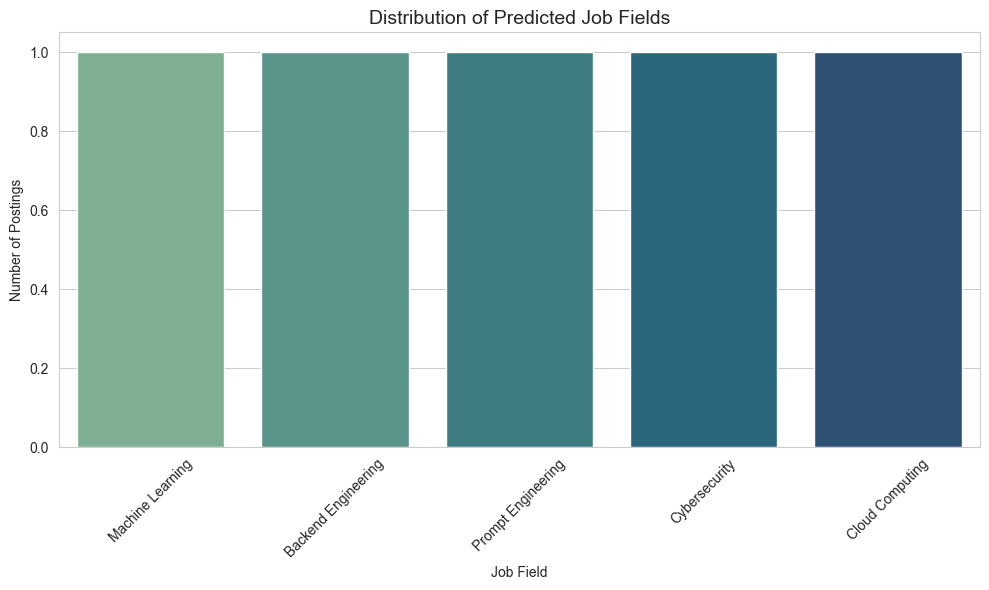

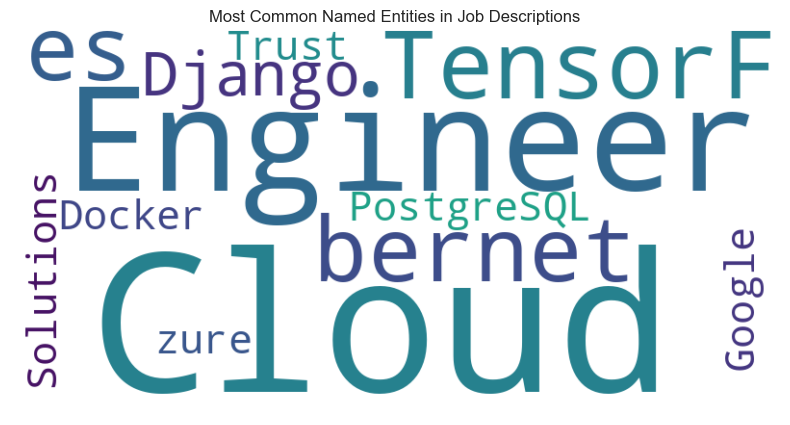

C:\Users\250wa\AppData\Local\Temp\ipykernel_448\4139822945.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette="Blues", alpha=0.7)


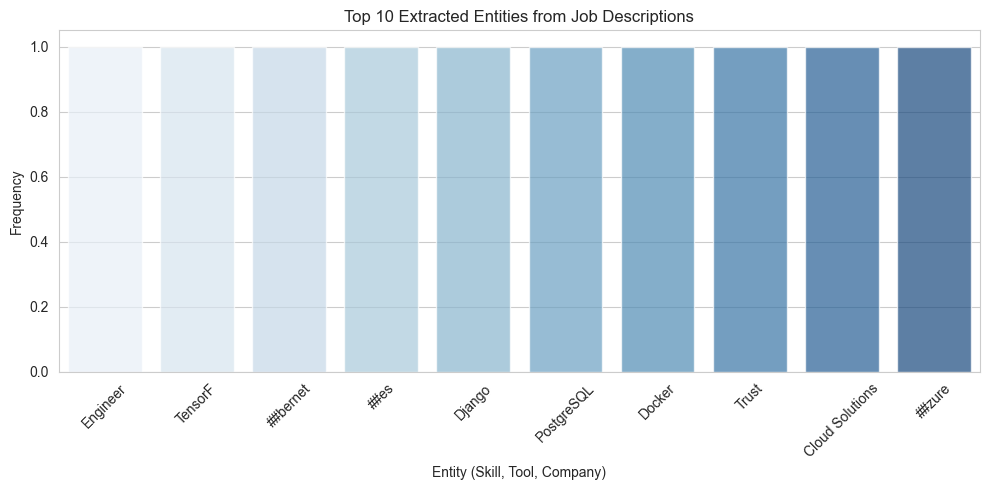

In [26]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# TEMPORARY: Only use the first 25 rows for fast testing
# To process the full dataset, comment out or remove this line
df_jobs = df_jobs.head(25)

# Job Field Distribution Chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_jobs, x="Predicted Field", palette="crest")
plt.title("Distribution of Predicted Job Fields", fontsize=14)
plt.xlabel("Job Field")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clean: Filter out low-value entities (e.g., short or common words)
filtered_entities = [
    word if isinstance(word, str) else word[0]
    for row in df_jobs["Entities"] for word in row
    if isinstance(word, (str, tuple))
    and len(word if isinstance(word, str) else word[0]) > 2
    and (word if isinstance(word, str) else word[0]).lower() not in ["the", "and", "with"]
]

# Word Cloud of Named Entities (Filtered)
all_words = " ".join(filtered_entities)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Named Entities in Job Descriptions")
plt.show()

# Bar Chart: Top 10 Named Entities (Filtered)
entity_counts = Counter(filtered_entities)
top_entities = entity_counts.most_common(10)

labels, values = zip(*top_entities)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values), palette="Blues", alpha=0.7)
plt.title("Top 10 Extracted Entities from Job Descriptions")
plt.xlabel("Entity (Skill, Tool, Company)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cell 7: Extract Ententies Visualization

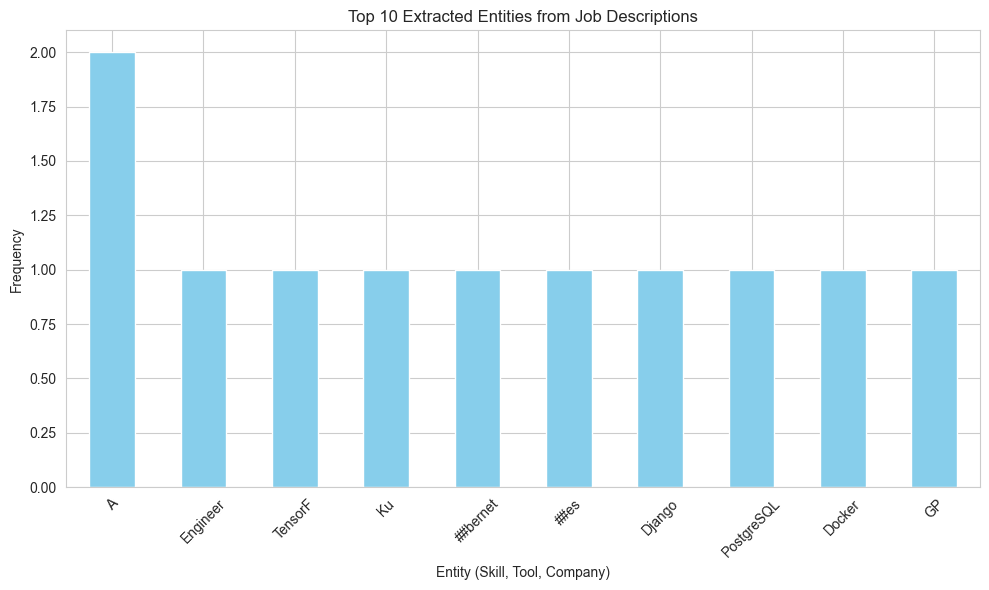

In [27]:
# Flatten all entities and count

import collections

all_entities = [entity[0] for sublist in df_jobs["Entities"] for entity in sublist]
entity_counter = collections.Counter(all_entities)

plt.figure(figsize=(10,6))
pd.Series(entity_counter).nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Extracted Entities from Job Descriptions")
plt.xlabel("Entity (Skill, Tool, Company)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cell 8: Conclusion

In [28]:
# Conclusion

print("\nSummary:")
print("- We automatically classified job fields using zero-shot learning.")
print("- We generated automatic summaries of job postings.")
print("- We extracted key skills, tools, and company names using NER.")
print("- Visualized trends across job fields and entities.")

print("\nFuture Enhancements:")
print("- Expand dataset with 1000+ job descriptions from Kaggle.")
print("- Fine-tune a custom Hugging Face model on job postings.")
print("- Deploy model as a web app with real-time job analysis.")



Summary:
- We automatically classified job fields using zero-shot learning.
- We generated automatic summaries of job postings.
- We extracted key skills, tools, and company names using NER.
- Visualized trends across job fields and entities.

Future Enhancements:
- Expand dataset with 1000+ job descriptions from Kaggle.
- Fine-tune a custom Hugging Face model on job postings.
- Deploy model as a web app with real-time job analysis.


This notebook demonstrates a Hugging Face NLP stack applied to job market analysis. It uses transformers for classification, summarization, and entity recognition, enabling scalable insights into job trends and required skills across roles.